In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras import  backend as K
from keras.datasets import mnist
import os
import numpy as np
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
(x_train, y_train),(x_test, y_test) = mnist.load_data()

D:\anaconda\envs\datasc\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\envs\datasc\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
D:\anaconda\envs\datasc\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


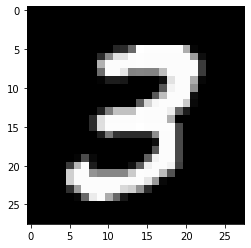

3


In [2]:
import matplotlib.pyplot as plt
import numpy as np
id = 7
image = np.array(x_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
# print(X_train[id])
print(y_train[id])

In [15]:
#herre we need to one hot encoding since out of the 10 available outputs only one is the answer
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [14]:
image_size = x_train.shape[1]
input_size = image_size*image_size


In [5]:
#reszing
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [6]:
import numpy as np
from statistics import *
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(x_train, y_train, test_size=0.16,random_state=10)
#making our model with adam optimizer as shown in the previouus ipynb file sniec it gives the best accuracy(validation)
#now tuning it with more lauyers different activation functions etc

In [7]:
model = Sequential()
model.add(Dense(128, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(64, input_dim=input_size, activation='softmax'))
model.add(Dropout(.2))
model.add(Dense(32, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.87, beta_2=0.991, epsilon=1e-07, amsgrad=False, name="Adam"),metrics=['accuracy'])
history_init = model.fit((train_x), (train_y),validation_data=((val_x),(val_y)),batch_size=68,epochs=100, verbose = 2)
x = mean(history_init.history['accuracy'])
print('Accuracy: %.2f' % (x*100))   
_, accuracy = model.evaluate(x_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))   
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
742/742 - 28s - loss: 1.2058 - accuracy: 0.5301 - val_loss: 0.3712 - val_accuracy: 0.9054
Epoch 2/100
742/742 - 6s - loss: 0.4853 - accuracy: 0.8619 - val_loss: 0.2399 - val_accuracy: 0.9371
Epoch 3/100
742/742 - 6s - loss: 0.3373 - accuracy: 0.9129 - val_loss: 0.2033 - val_accuracy: 0.9492
Epoch 4/100
742/742 - 6s - loss: 0.2830 - accuracy: 0.9264 - val_loss: 0.1727 - val_accuracy: 0.9523
Epoch 5/100
742/742 - 6s - loss: 0.2490 - accuracy: 0.9367 - val_loss: 0.1604 - val_accuracy: 0.9579
Epoch 6/100
742/742 - 6s - loss: 0.2321 - accuracy: 0.9410 - val_loss: 0.1634 - val_accuracy: 0.9585
Epoch 7/100
742/742 - 6s - loss: 0.2139 - accuracy: 0.9448 - val_loss: 0.1623 - val_accuracy: 0.9575
Epoch 8/100
742/742 - 6s - loss: 0.2035 - accuracy: 0.9484 - val_loss: 0.1570 - val_accuracy: 0.9591
Epoch 9/100
742/742 - 6s - loss: 0.1976 - accuracy: 0.9507 - val_loss: 0.1485 - val_accuracy: 0.9639
Epoch 10/100
742/742 - 6s - loss: 0.1861 - accuracy: 0.9536 - val_loss: 0.1459 - val_accur

In [8]:
model = Sequential()#making our initial model with no drop and regulization 
model.add(Dense(128, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(64, input_dim=input_size, activation='softmax'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.87, beta_2=0.991, epsilon=1e-07, amsgrad=False, name="Adam"),metrics=['accuracy'])
history_init = model.fit((train_x), (train_y),validation_data=((val_x),(val_y)),batch_size=68,epochs=100, verbose = 2)
x = mean(history_init.history['accuracy'])
print('Accuracy: %.2f' % (x*100))   
_, accuracy = model.evaluate(x_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))   
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
742/742 - 6s - loss: 0.9213 - accuracy: 0.6886 - val_loss: 0.2912 - val_accuracy: 0.9296
Epoch 2/100
742/742 - 6s - loss: 0.4857 - accuracy: 0.8753 - val_loss: 0.2061 - val_accuracy: 0.9438
Epoch 3/100
742/742 - 6s - loss: 0.3454 - accuracy: 0.9149 - val_loss: 0.1794 - val_accuracy: 0.9501
Epoch 4/100
742/742 - 5s - loss: 0.2917 - accuracy: 0.9300 - val_loss: 0.1620 - val_accuracy: 0.9569
Epoch 5/100
742/742 - 6s - loss: 0.2582 - accuracy: 0.9376 - val_loss: 0.1512 - val_accuracy: 0.9592
Epoch 6/100
742/742 - 6s - loss: 0.2398 - accuracy: 0.9429 - val_loss: 0.1383 - val_accuracy: 0.9631
Epoch 7/100
742/742 - 6s - loss: 0.2211 - accuracy: 0.9451 - val_loss: 0.1610 - val_accuracy: 0.9559
Epoch 8/100
742/742 - 6s - loss: 0.2105 - accuracy: 0.9497 - val_loss: 0.1540 - val_accuracy: 0.9598
Epoch 9/100
742/742 - 6s - loss: 0.2071 - accuracy: 0.9507 - val_loss: 0.1350 - val_accuracy: 0.9644
Epoch 10/100
742/742 - 6s - loss: 0.1916 - accuracy: 0.9529 - val_loss: 0.1415 - val_accura

In [9]:
model = Sequential() 
model.add(Dense(128, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(64, input_dim=input_size, activation='softmax'))
model.add(Dropout(.2))
model.add(Dense(64, input_dim=input_size, activation='softmax'))
model.add(Dropout(.2))
model.add(Dense(32, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.87, beta_2=0.991, epsilon=1e-07, amsgrad=False, name="Adam"),metrics=['accuracy'])
history_init = model.fit((train_x), (train_y),validation_data=((val_x),(val_y)),batch_size=68,epochs=100, verbose = 2)
x = mean(history_init.history['accuracy'])
print('Accuracy: %.2f' % (x*100))   
_, accuracy = model.evaluate(x_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))   
_, accuracy = model.evaluate(x_test,y_test).
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
742/742 - 8s - loss: 1.4063 - accuracy: 0.4048 - val_loss: 0.8599 - val_accuracy: 0.6371
Epoch 2/100
742/742 - 6s - loss: 0.7066 - accuracy: 0.7592 - val_loss: 0.3125 - val_accuracy: 0.9198
Epoch 3/100
742/742 - 6s - loss: 0.4463 - accuracy: 0.8863 - val_loss: 0.2427 - val_accuracy: 0.9396
Epoch 4/100
742/742 - 7s - loss: 0.3547 - accuracy: 0.9137 - val_loss: 0.2208 - val_accuracy: 0.9464
Epoch 5/100
742/742 - 7s - loss: 0.3110 - accuracy: 0.9248 - val_loss: 0.2059 - val_accuracy: 0.9510
Epoch 6/100
742/742 - 7s - loss: 0.2919 - accuracy: 0.9302 - val_loss: 0.1989 - val_accuracy: 0.9514
Epoch 7/100
742/742 - 7s - loss: 0.2692 - accuracy: 0.9363 - val_loss: 0.1836 - val_accuracy: 0.9566
Epoch 8/100
742/742 - 7s - loss: 0.2510 - accuracy: 0.9407 - val_loss: 0.1742 - val_accuracy: 0.9603
Epoch 9/100
742/742 - 7s - loss: 0.2341 - accuracy: 0.9443 - val_loss: 0.1548 - val_accuracy: 0.9624
Epoch 10/100
742/742 - 7s - loss: 0.2296 - accuracy: 0.9465 - val_loss: 0.1720 - val_accura

In [10]:
model = Sequential()
model.add(Dense(128, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(128, input_dim=input_size, activation='softmax'))
model.add(Dropout(.2))
model.add(Dense(64, input_dim=input_size, activation='softmax'))
model.add(Dropout(.2))
model.add(Dense(32, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.87, beta_2=0.991, epsilon=1e-07, amsgrad=False, name="Adam"),metrics=['accuracy'])
history_init = model.fit((train_x), (train_y),validation_data=((val_x),(val_y)),batch_size=68,epochs=100, verbose = 2)
x = mean(history_init.history['accuracy'])
print('Accuracy: %.2f' % (x*100))   
_, accuracy = model.evaluate(x_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))   
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
742/742 - 8s - loss: 1.5248 - accuracy: 0.3830 - val_loss: 0.8742 - val_accuracy: 0.6040
Epoch 2/100
742/742 - 7s - loss: 0.7830 - accuracy: 0.7318 - val_loss: 0.3184 - val_accuracy: 0.9191
Epoch 3/100
742/742 - 7s - loss: 0.4722 - accuracy: 0.8783 - val_loss: 0.2660 - val_accuracy: 0.9319
Epoch 4/100
742/742 - 8s - loss: 0.3565 - accuracy: 0.9129 - val_loss: 0.2196 - val_accuracy: 0.9481
Epoch 5/100
742/742 - 8s - loss: 0.3088 - accuracy: 0.9277 - val_loss: 0.2022 - val_accuracy: 0.9466
Epoch 6/100
742/742 - 7s - loss: 0.2880 - accuracy: 0.9318 - val_loss: 0.2127 - val_accuracy: 0.9507
Epoch 7/100
742/742 - 7s - loss: 0.2683 - accuracy: 0.9363 - val_loss: 0.1774 - val_accuracy: 0.9580
Epoch 8/100
742/742 - 7s - loss: 0.2456 - accuracy: 0.9423 - val_loss: 0.1680 - val_accuracy: 0.9575
Epoch 9/100
742/742 - 7s - loss: 0.2345 - accuracy: 0.9459 - val_loss: 0.1723 - val_accuracy: 0.9597
Epoch 10/100
742/742 - 7s - loss: 0.2240 - accuracy: 0.9475 - val_loss: 0.1825 - val_accura

In [11]:
model = Sequential()
model.add(Dense(128, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(64, input_dim=input_size, activation='softmax'))
model.add(Dropout(.2))
model.add(Dense(64, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.87, beta_2=0.991, epsilon=1e-07, amsgrad=False, name="Adam"),metrics=['accuracy'])
history_init = model.fit((train_x), (train_y),validation_data=((val_x),(val_y)),batch_size=68,epochs=100, verbose = 2)
x = mean(history_init.history['accuracy'])
print('Accuracy: %.2f' % (x*100))   
_, accuracy = model.evaluate(x_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))   
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
742/742 - 4s - loss: 0.9389 - accuracy: 0.6651 - val_loss: 0.2649 - val_accuracy: 0.9362
Epoch 2/100
742/742 - 2s - loss: 0.3956 - accuracy: 0.8924 - val_loss: 0.1907 - val_accuracy: 0.9502
Epoch 3/100
742/742 - 2s - loss: 0.2807 - accuracy: 0.9261 - val_loss: 0.1642 - val_accuracy: 0.9570
Epoch 4/100
742/742 - 2s - loss: 0.2340 - accuracy: 0.9392 - val_loss: 0.1543 - val_accuracy: 0.9586
Epoch 5/100
742/742 - 2s - loss: 0.2095 - accuracy: 0.9453 - val_loss: 0.1470 - val_accuracy: 0.9583
Epoch 6/100
742/742 - 2s - loss: 0.2007 - accuracy: 0.9479 - val_loss: 0.1538 - val_accuracy: 0.9593
Epoch 7/100
742/742 - 2s - loss: 0.1902 - accuracy: 0.9518 - val_loss: 0.1451 - val_accuracy: 0.9636
Epoch 8/100
742/742 - 2s - loss: 0.1840 - accuracy: 0.9520 - val_loss: 0.1455 - val_accuracy: 0.9635
Epoch 9/100
742/742 - 2s - loss: 0.1839 - accuracy: 0.9532 - val_loss: 0.1389 - val_accuracy: 0.9641
Epoch 10/100
742/742 - 2s - loss: 0.1833 - accuracy: 0.9534 - val_loss: 0.1308 - val_accura

In [ ]:
#highest accuracy test is 97.20